# Numerical Data

# Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [2]:
data = pd.read_csv('car_price_prediction.csv')
data

ID  Price    Levy  Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399.0         LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018.0     CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     NaN         HONDA      FIT        2006  Hatchback   
3      45769185   3607   862.0          FORD   Escape        2011       Jeep   
4      45809263  11726   446.0         HONDA      FIT        2014  Hatchback   
...         ...    ...     ...           ...      ...         ...        ...   
19232  45798355   8467     NaN  MERCEDESBENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831.0       HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836.0       HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288.0     CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753.0       HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km          6   
1                   No    Petrol             3  192000 km          6   
2                   No    Petrol           1.3  200000 km          4   
3                  Yes    Hybrid           2.5  168966 km          4   
4                  Yes    Petrol           1.3   91901 km          4   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km          4   
19233              Yes    Petrol           2.4  161600 km          4   
19234              Yes    Diesel             2  116365 km          4   
19235              Yes    Diesel             2   51258 km          4   
19236              Yes    Hybrid           2.4  186923 km          4   

      Gear box type Drive wheels  \
0         Automatic          4x4   
1         Tiptronic          4x4   
2          Variator        Front   
3         Automatic          4x4   
4         Automatic        Front   
...             ...          ...   
19232        Manual         Rear   
19233     Tiptronic        Front   
19234     Automatic        Front   
19235     Automatic        Front   
19236     Automatic        Front   

                                                   Doors            Wheel  \
0      ##############################################...       Left wheel   
1      ##############################################...       Left wheel   
2      ##############################################...  Righthand drive   
3      ##############################################...       Left wheel   
4      ##############################################...       Left wheel   
...                                                  ...              ...   
19232                                             27-Jun       Left wheel   
19233  ##############################################...       Left wheel   
19234  ##############################################...       Left wheel   
19235  ##############################################...       Left wheel   
19236  ##############################################...       Left wheel   

        Color  Airbags  
0      Silver       12  
1       Black        8  
2       Black        2  
3       White        0  
4      Silver        4  
...       ...      ...  
19232  Silver        5  
19233     Red        8  
19234    Grey        4  
19235   Black        4  
19236   White       12  

[19237 rows x 18 columns]

# Handling Missing Data

Checking for NAN values and filling the NAN values with appropriate value

In [3]:
data.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [4]:
data['Levy'] = data['Levy'].fillna(0)

# Data Statistics

In [5]:
data.describe()

ID         Price          Levy    Prod. year     Cylinders  \
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000   
mean   4.557654e+07  1.855593e+04    632.528669   2010.912824      4.582991   
std    9.365914e+05  1.905813e+05    567.721688      5.668673      1.199933   
min    2.074688e+07  1.000000e+00      0.000000   1939.000000      1.000000   
25%    4.569837e+07  5.331000e+03      0.000000   2009.000000      4.000000   
50%    4.577231e+07  1.317200e+04    642.000000   2012.000000      4.000000   
75%    4.580204e+07  2.207500e+04    917.000000   2015.000000      4.000000   
max    4.581665e+07  2.630750e+07  11714.000000   2020.000000     16.000000   

            Airbags  
count  19237.000000  
mean       6.582627  
std        4.320168  
min        0.000000  
25%        4.000000  
50%        6.000000  
75%       12.000000  
max       16.000000

# Dropping Insignificant columns

In [6]:
data.drop(['Doors'],axis=1,inplace=True)

In [7]:
data.drop(['Wheel'],axis=1,inplace=True)

In [8]:
data.drop(['ID'],axis=1,inplace=True)

In [9]:
data

Price    Levy  Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0         LEXUS   RX 450        2010       Jeep   
1      16621  1018.0     CHEVROLET  Equinox        2011       Jeep   
2       8467     0.0         HONDA      FIT        2006  Hatchback   
3       3607   862.0          FORD   Escape        2011       Jeep   
4      11726   446.0         HONDA      FIT        2014  Hatchback   
...      ...     ...           ...      ...         ...        ...   
19232   8467     0.0  MERCEDESBENZ  CLK 200        1999      Coupe   
19233  15681   831.0       HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0       HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288.0     CHEVROLET  Captiva        2007       Jeep   
19236    470   753.0       HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km          6   
1                   No    Petrol             3  192000 km          6   
2                   No    Petrol           1.3  200000 km          4   
3                  Yes    Hybrid           2.5  168966 km          4   
4                  Yes    Petrol           1.3   91901 km          4   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km          4   
19233              Yes    Petrol           2.4  161600 km          4   
19234              Yes    Diesel             2  116365 km          4   
19235              Yes    Diesel             2   51258 km          4   
19236              Yes    Hybrid           2.4  186923 km          4   

      Gear box type Drive wheels   Color  Airbags  
0         Automatic          4x4  Silver       12  
1         Tiptronic          4x4   Black        8  
2          Variator        Front   Black        2  
3         Automatic          4x4   White        0  
4         Automatic        Front  Silver        4  
...             ...          ...     ...      ...  
19232        Manual         Rear  Silver        5  
19233     Tiptronic        Front     Red        8  
19234     Automatic        Front    Grey        4  
19235     Automatic        Front   Black        4  
19236     Automatic        Front   White       12  

[19237 rows x 15 columns]

# Checking data types of each column and conveting to numerical datatype

In [10]:
data.dtypes

Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Color                object
Airbags               int64
dtype: object

In [11]:
encoder = LabelEncoder()
data['Manufacturer'] = encoder.fit_transform(data['Manufacturer'])
data['Model'] = encoder.fit_transform(data['Model'])
data['Category'] = encoder.fit_transform(data['Category'])
data['Leather interior'] = encoder.fit_transform(data['Leather interior'])
data['Fuel type'] = encoder.fit_transform(data['Fuel type'])
data['Gear box type'] = encoder.fit_transform(data['Fuel type'])
data['Drive wheels'] = encoder.fit_transform(data['Drive wheels'])
data['Color'] = encoder.fit_transform(data['Color'])
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = data['Mileage'].astype(int)
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
data['Engine volume'] = data['Engine volume'].astype(float)

In [12]:
data.dtypes

Price                 int64
Levy                float64
Manufacturer          int32
Model                 int32
Prod. year            int64
Category              int32
Leather interior      int32
Fuel type             int32
Engine volume       float64
Mileage               int32
Cylinders             int64
Gear box type         int64
Drive wheels          int32
Color                 int32
Airbags               int64
dtype: object

In [13]:
data

Price    Levy  Manufacturer  Model  Prod. year  Category  \
0      13328  1399.0            32   1241        2010         4   
1      16621  1018.0             8    658        2011         4   
2       8467     0.0            21    681        2006         3   
3       3607   862.0            16    661        2011         4   
4      11726   446.0            21    681        2014         3   
...      ...     ...           ...    ...         ...       ...   
19232   8467     0.0            36    379        1999         1   
19233  15681   831.0            23   1332        2011         9   
19234  26108   836.0            23   1441        2010         4   
19235   5331  1288.0             8    456        2007         4   
19236    470   753.0            23   1332        2012         9   

       Leather interior  Fuel type  Engine volume  Mileage  Cylinders  \
0                     1          2            3.5   186005          6   
1                     0          5            3.0   192000          6   
2                     0          5            1.3   200000          4   
3                     1          2            2.5   168966          4   
4                     1          5            1.3    91901          4   
...                 ...        ...            ...      ...        ...   
19232                 1          0            2.0   300000          4   
19233                 1          5            2.4   161600          4   
19234                 1          1            2.0   116365          4   
19235                 1          1            2.0    51258          4   
19236                 1          2            2.4   186923          4   

       Gear box type  Drive wheels  Color  Airbags  
0                  2             0     12       12  
1                  5             0      1        8  
2                  5             1      1        2  
3                  2             0     14        0  
4                  5             1     12        4  
...              ...           ...    ...      ...  
19232              0             2     12        5  
19233              5             1     11        8  
19234              1             1      7        4  
19235              1             1      1        4  
19236              2             1     14       12  

[19237 rows x 15 columns]

# Plotting graphs

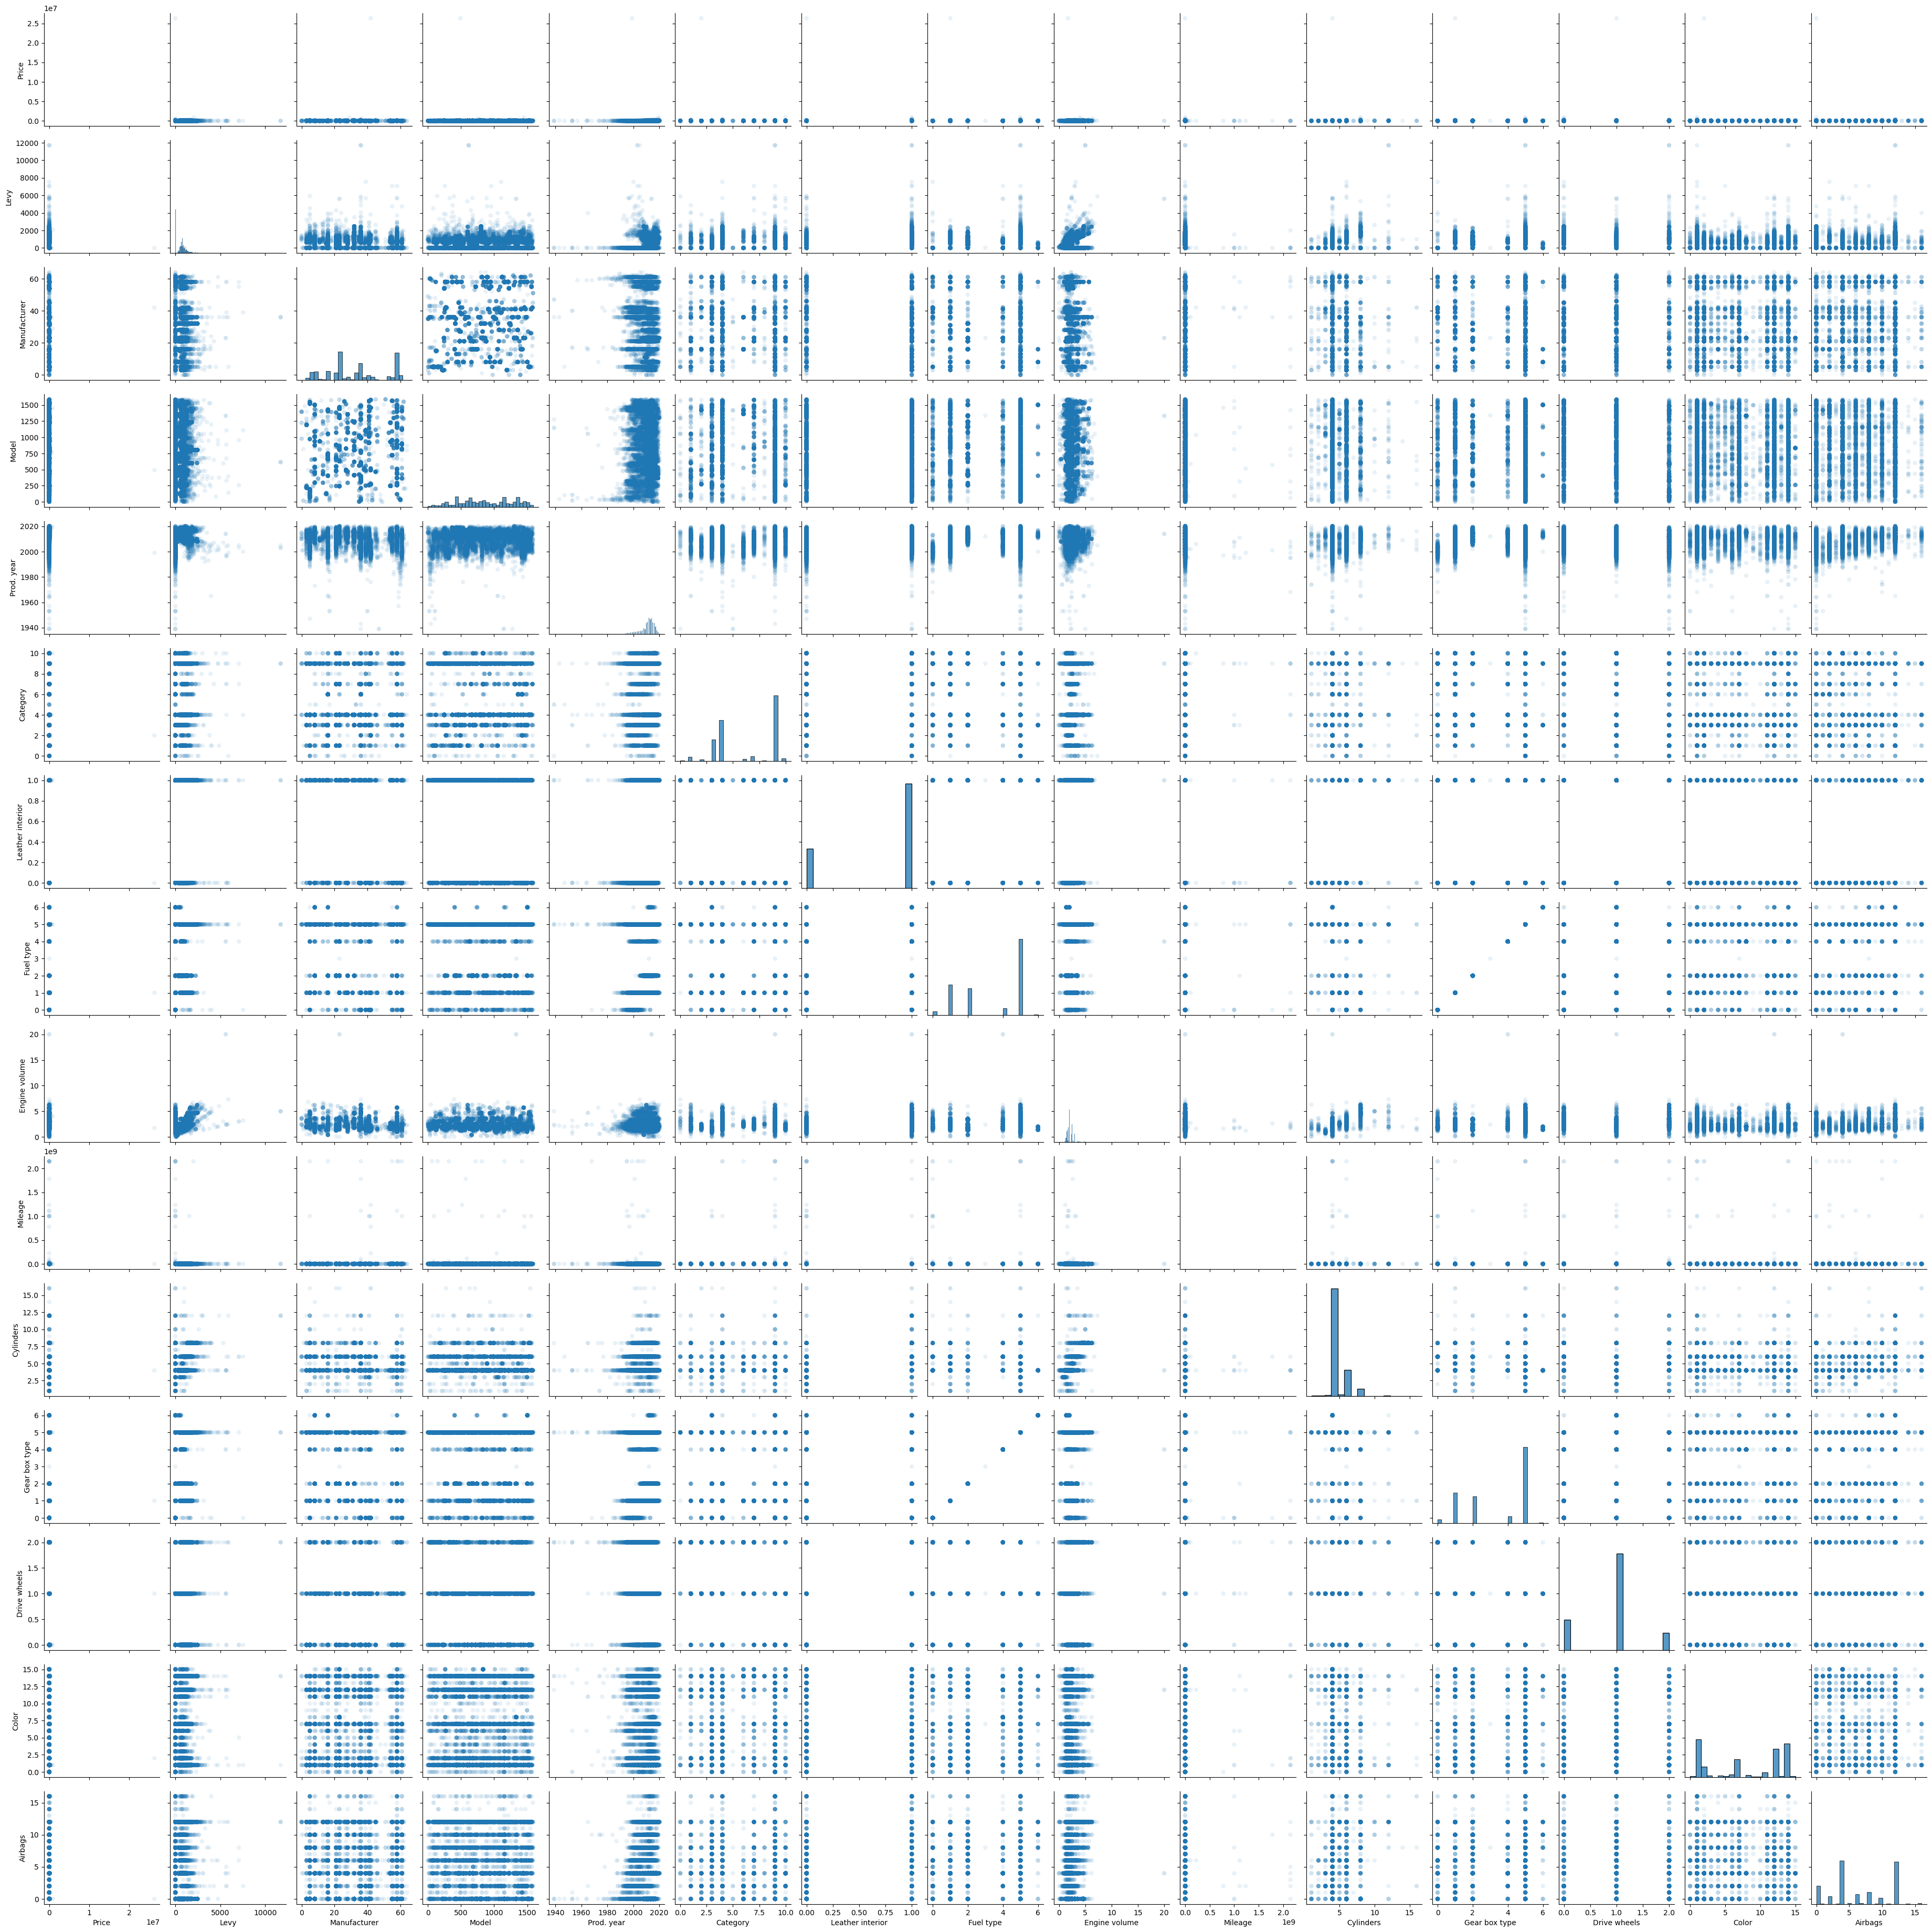

In [14]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

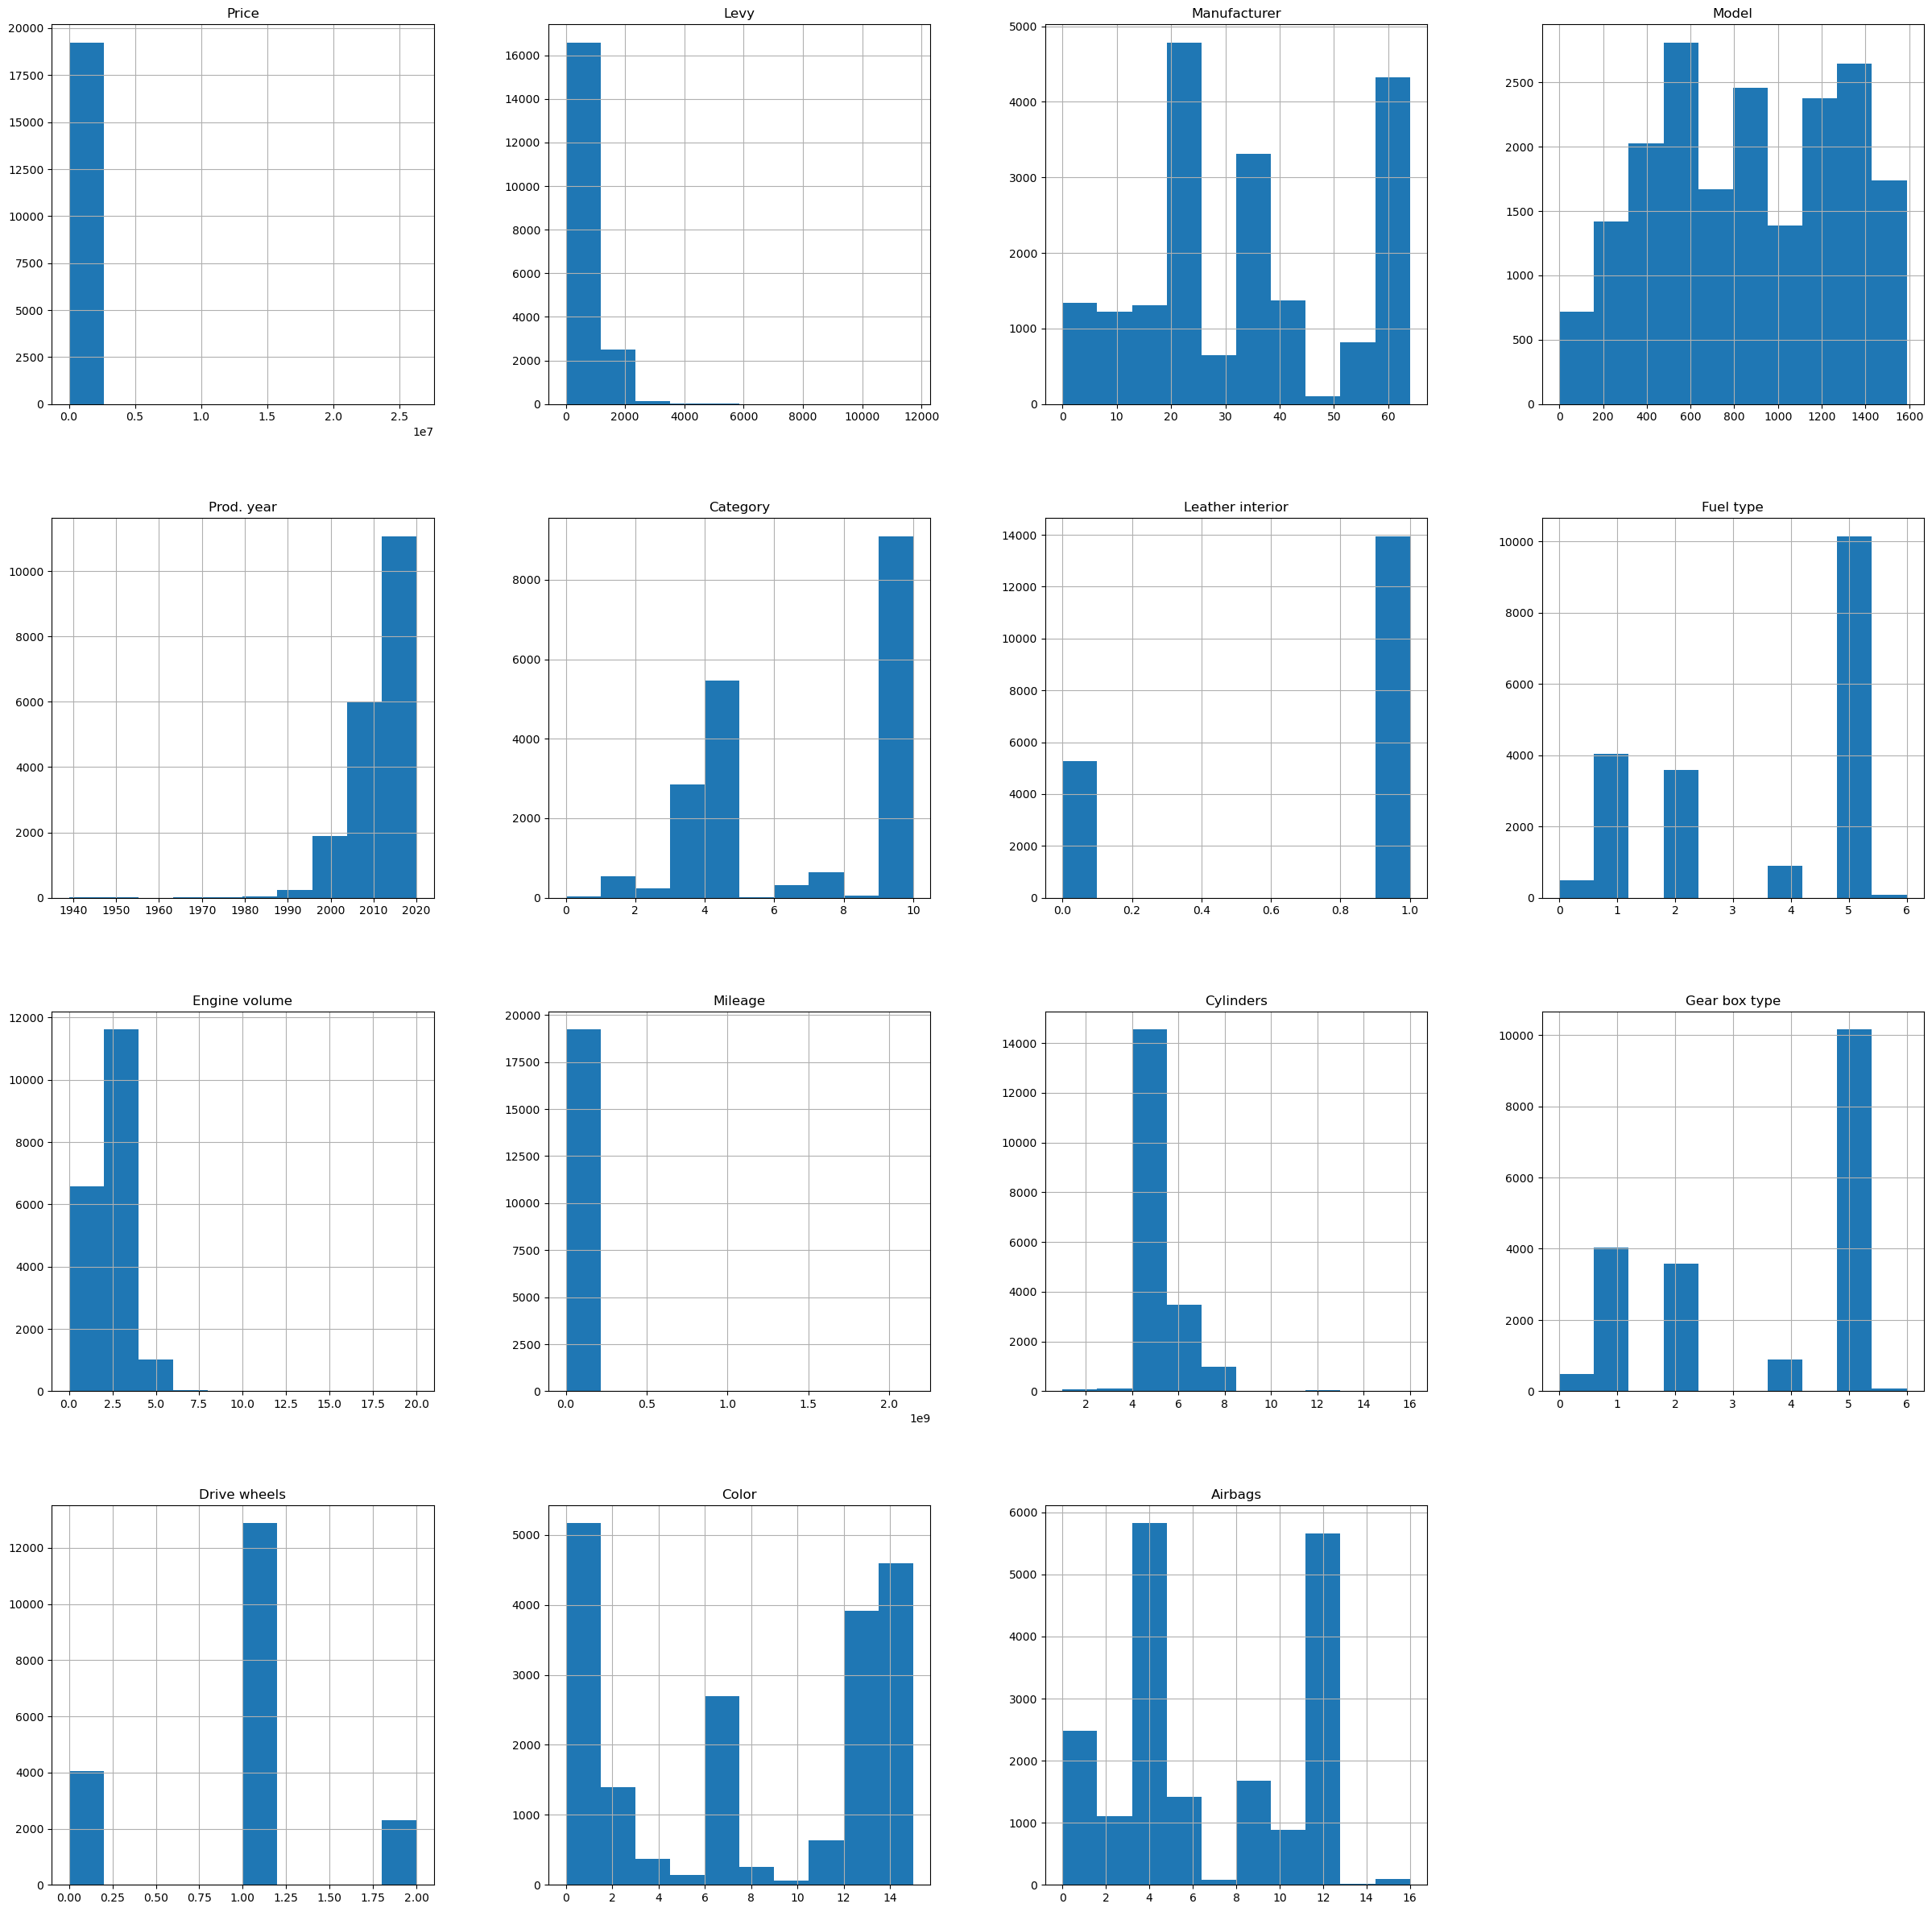

In [15]:
data.hist(figsize=(30, 30))
plt.show()

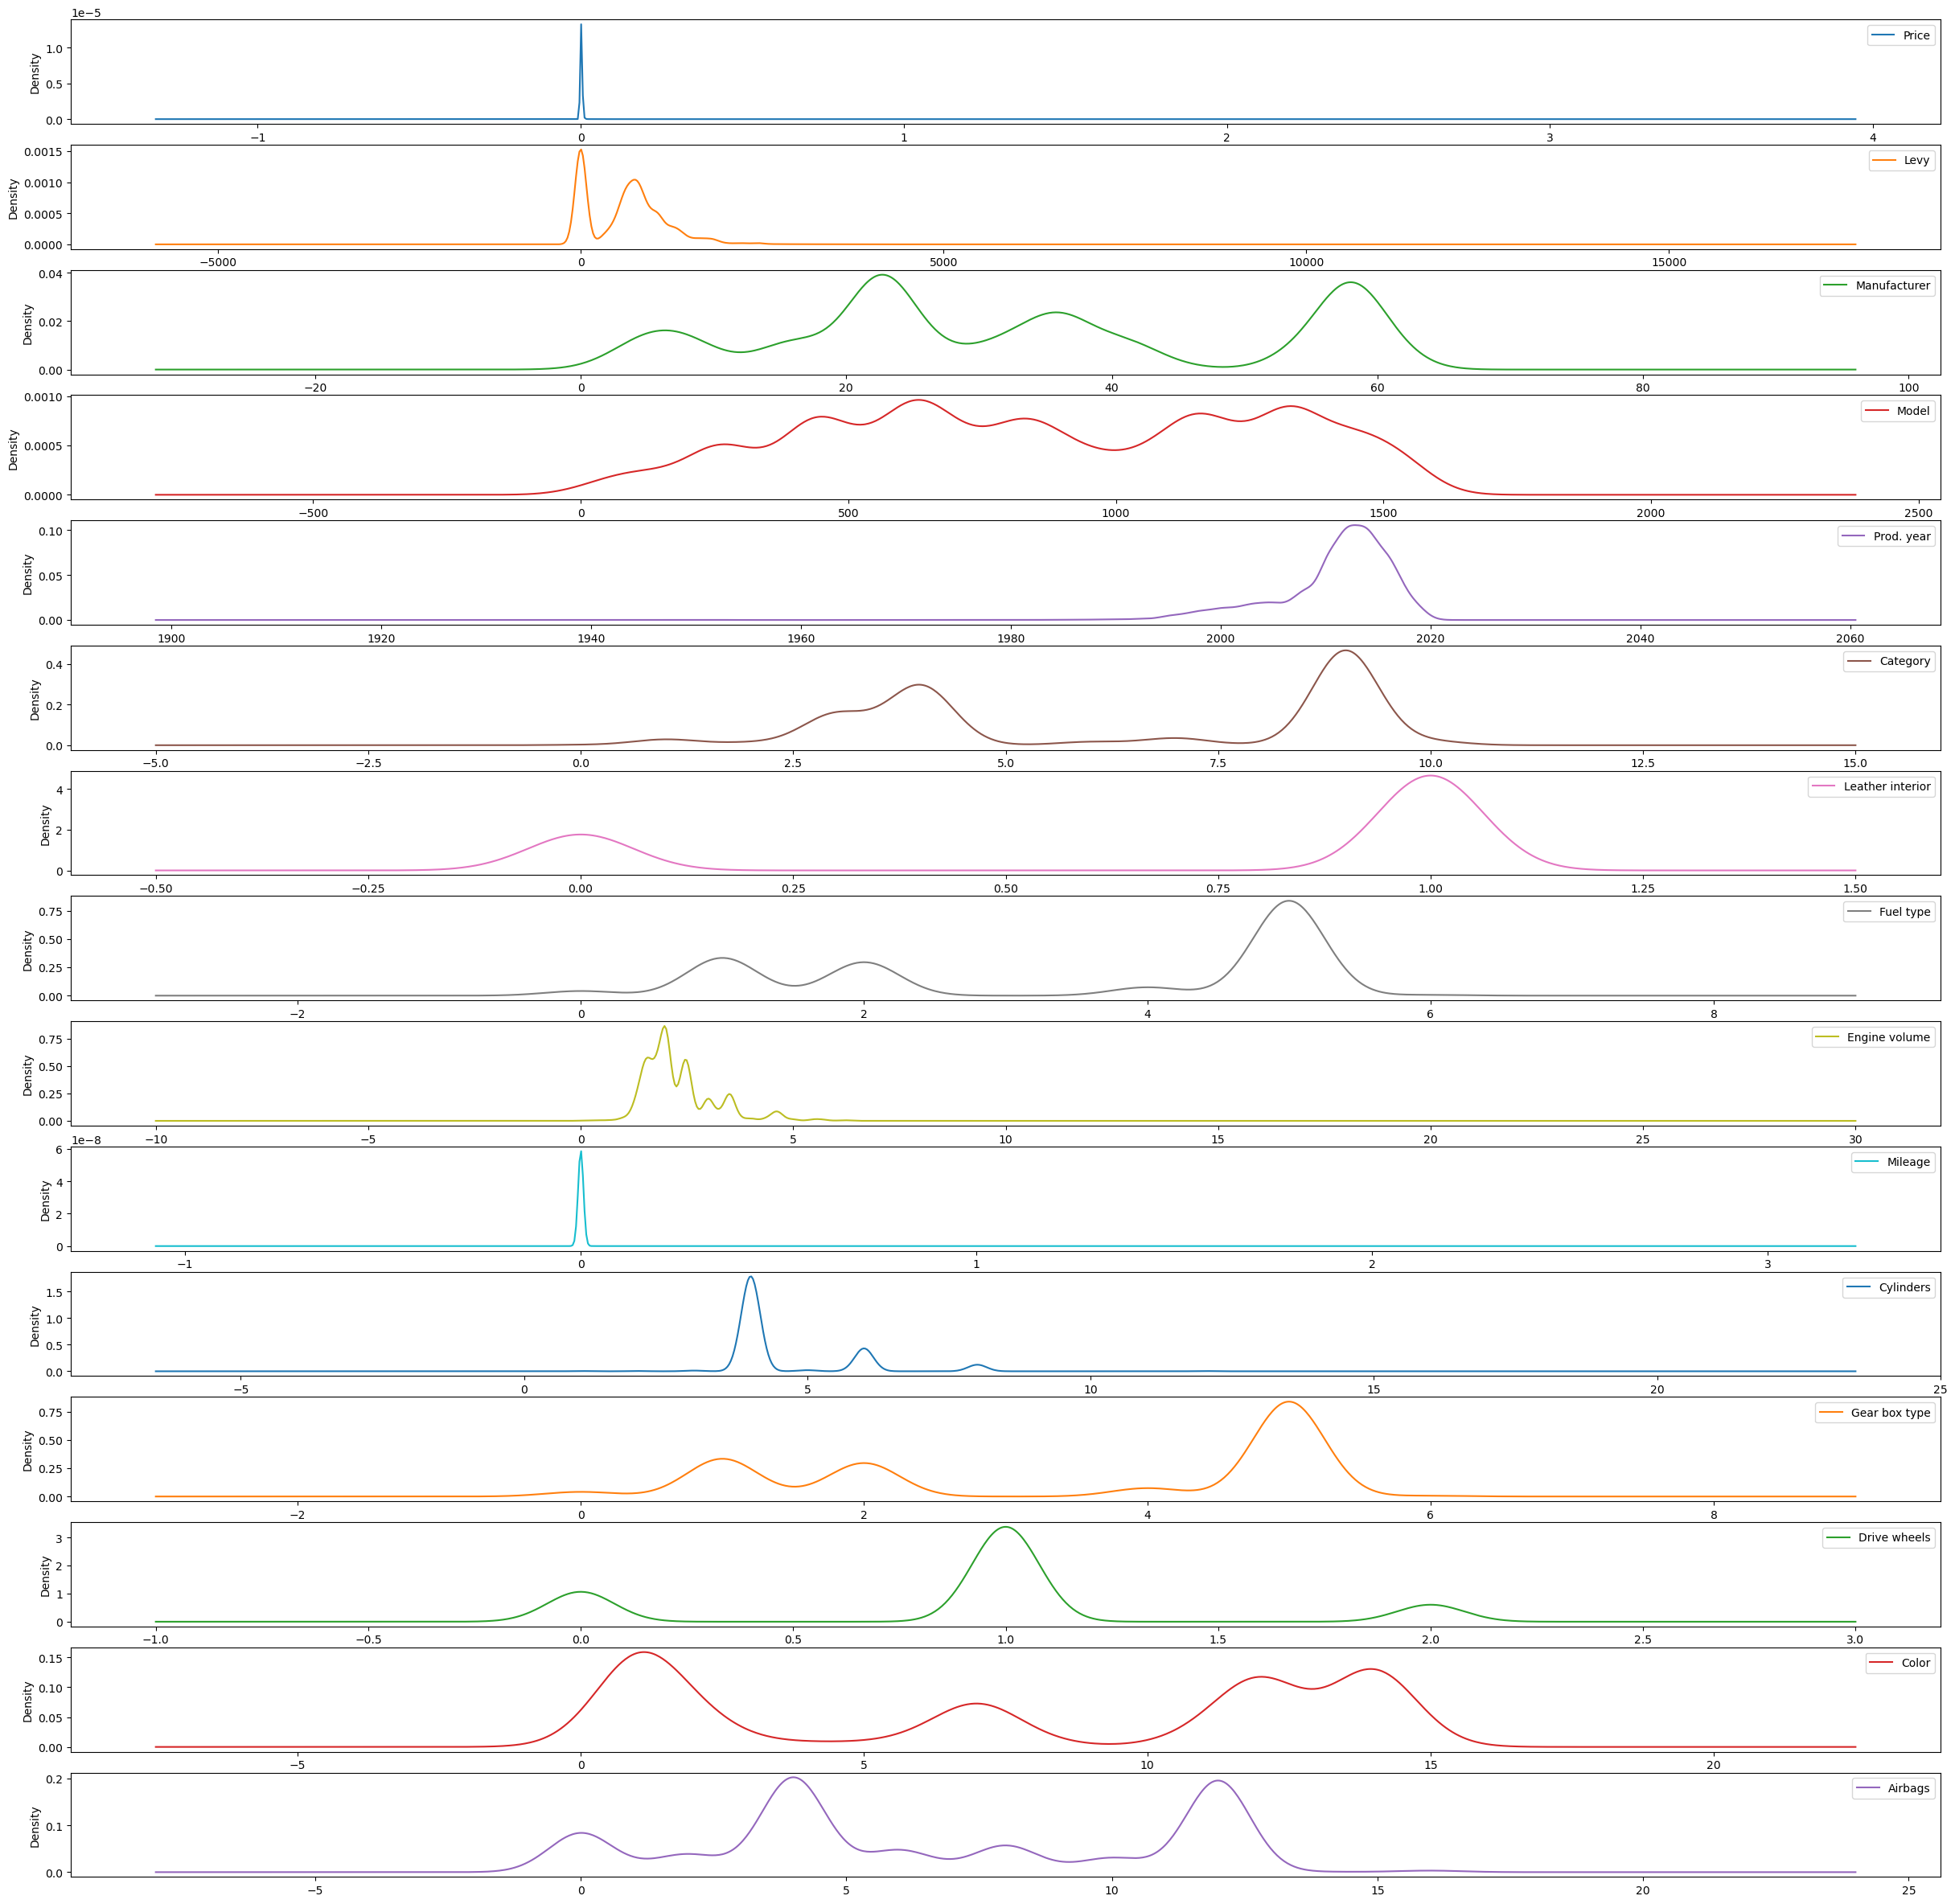

In [16]:
data.plot(kind='density',subplots=True,sharex=False,figsize=(30, 30))
plt.show()

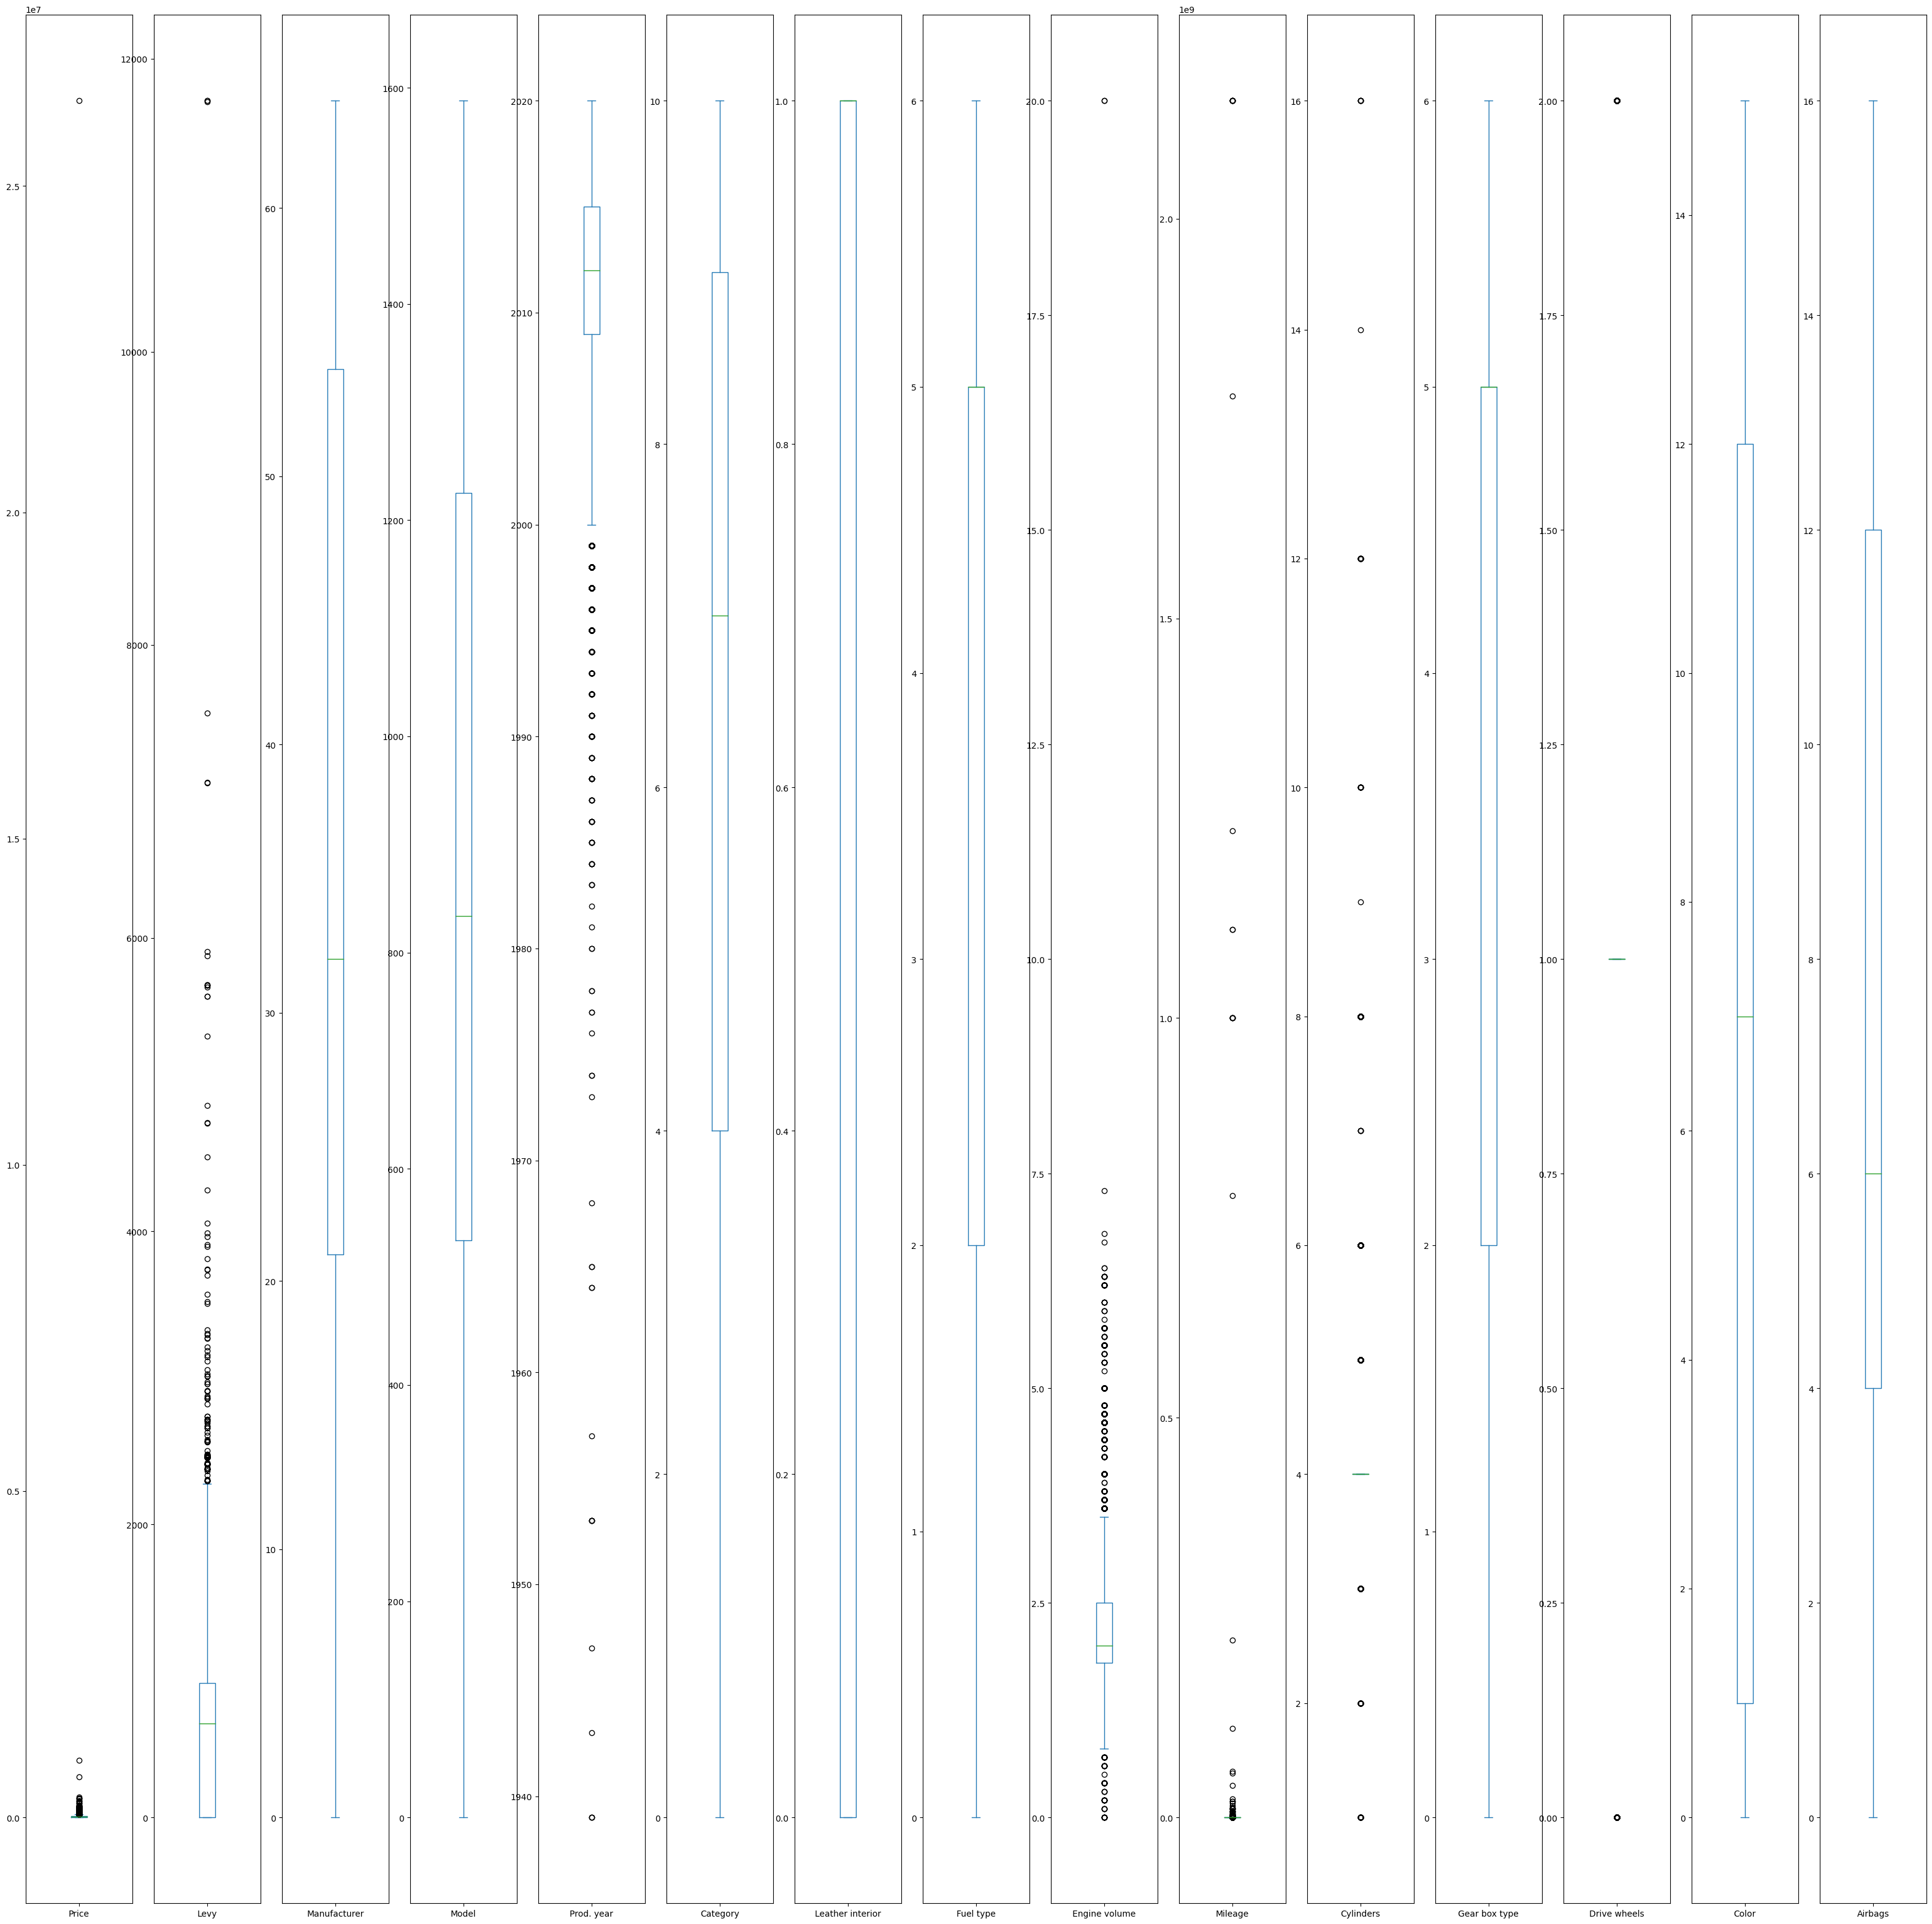

In [17]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False, figsize=(40, 40))
plt.show()

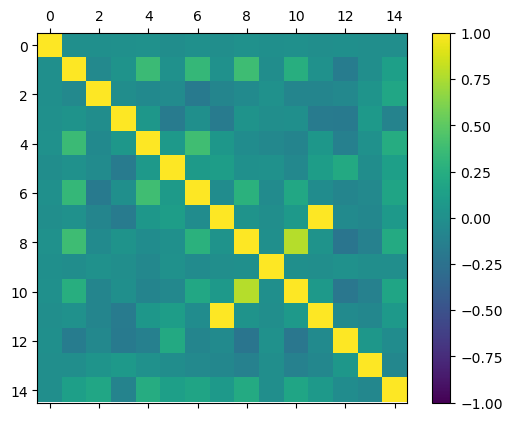

In [18]:
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

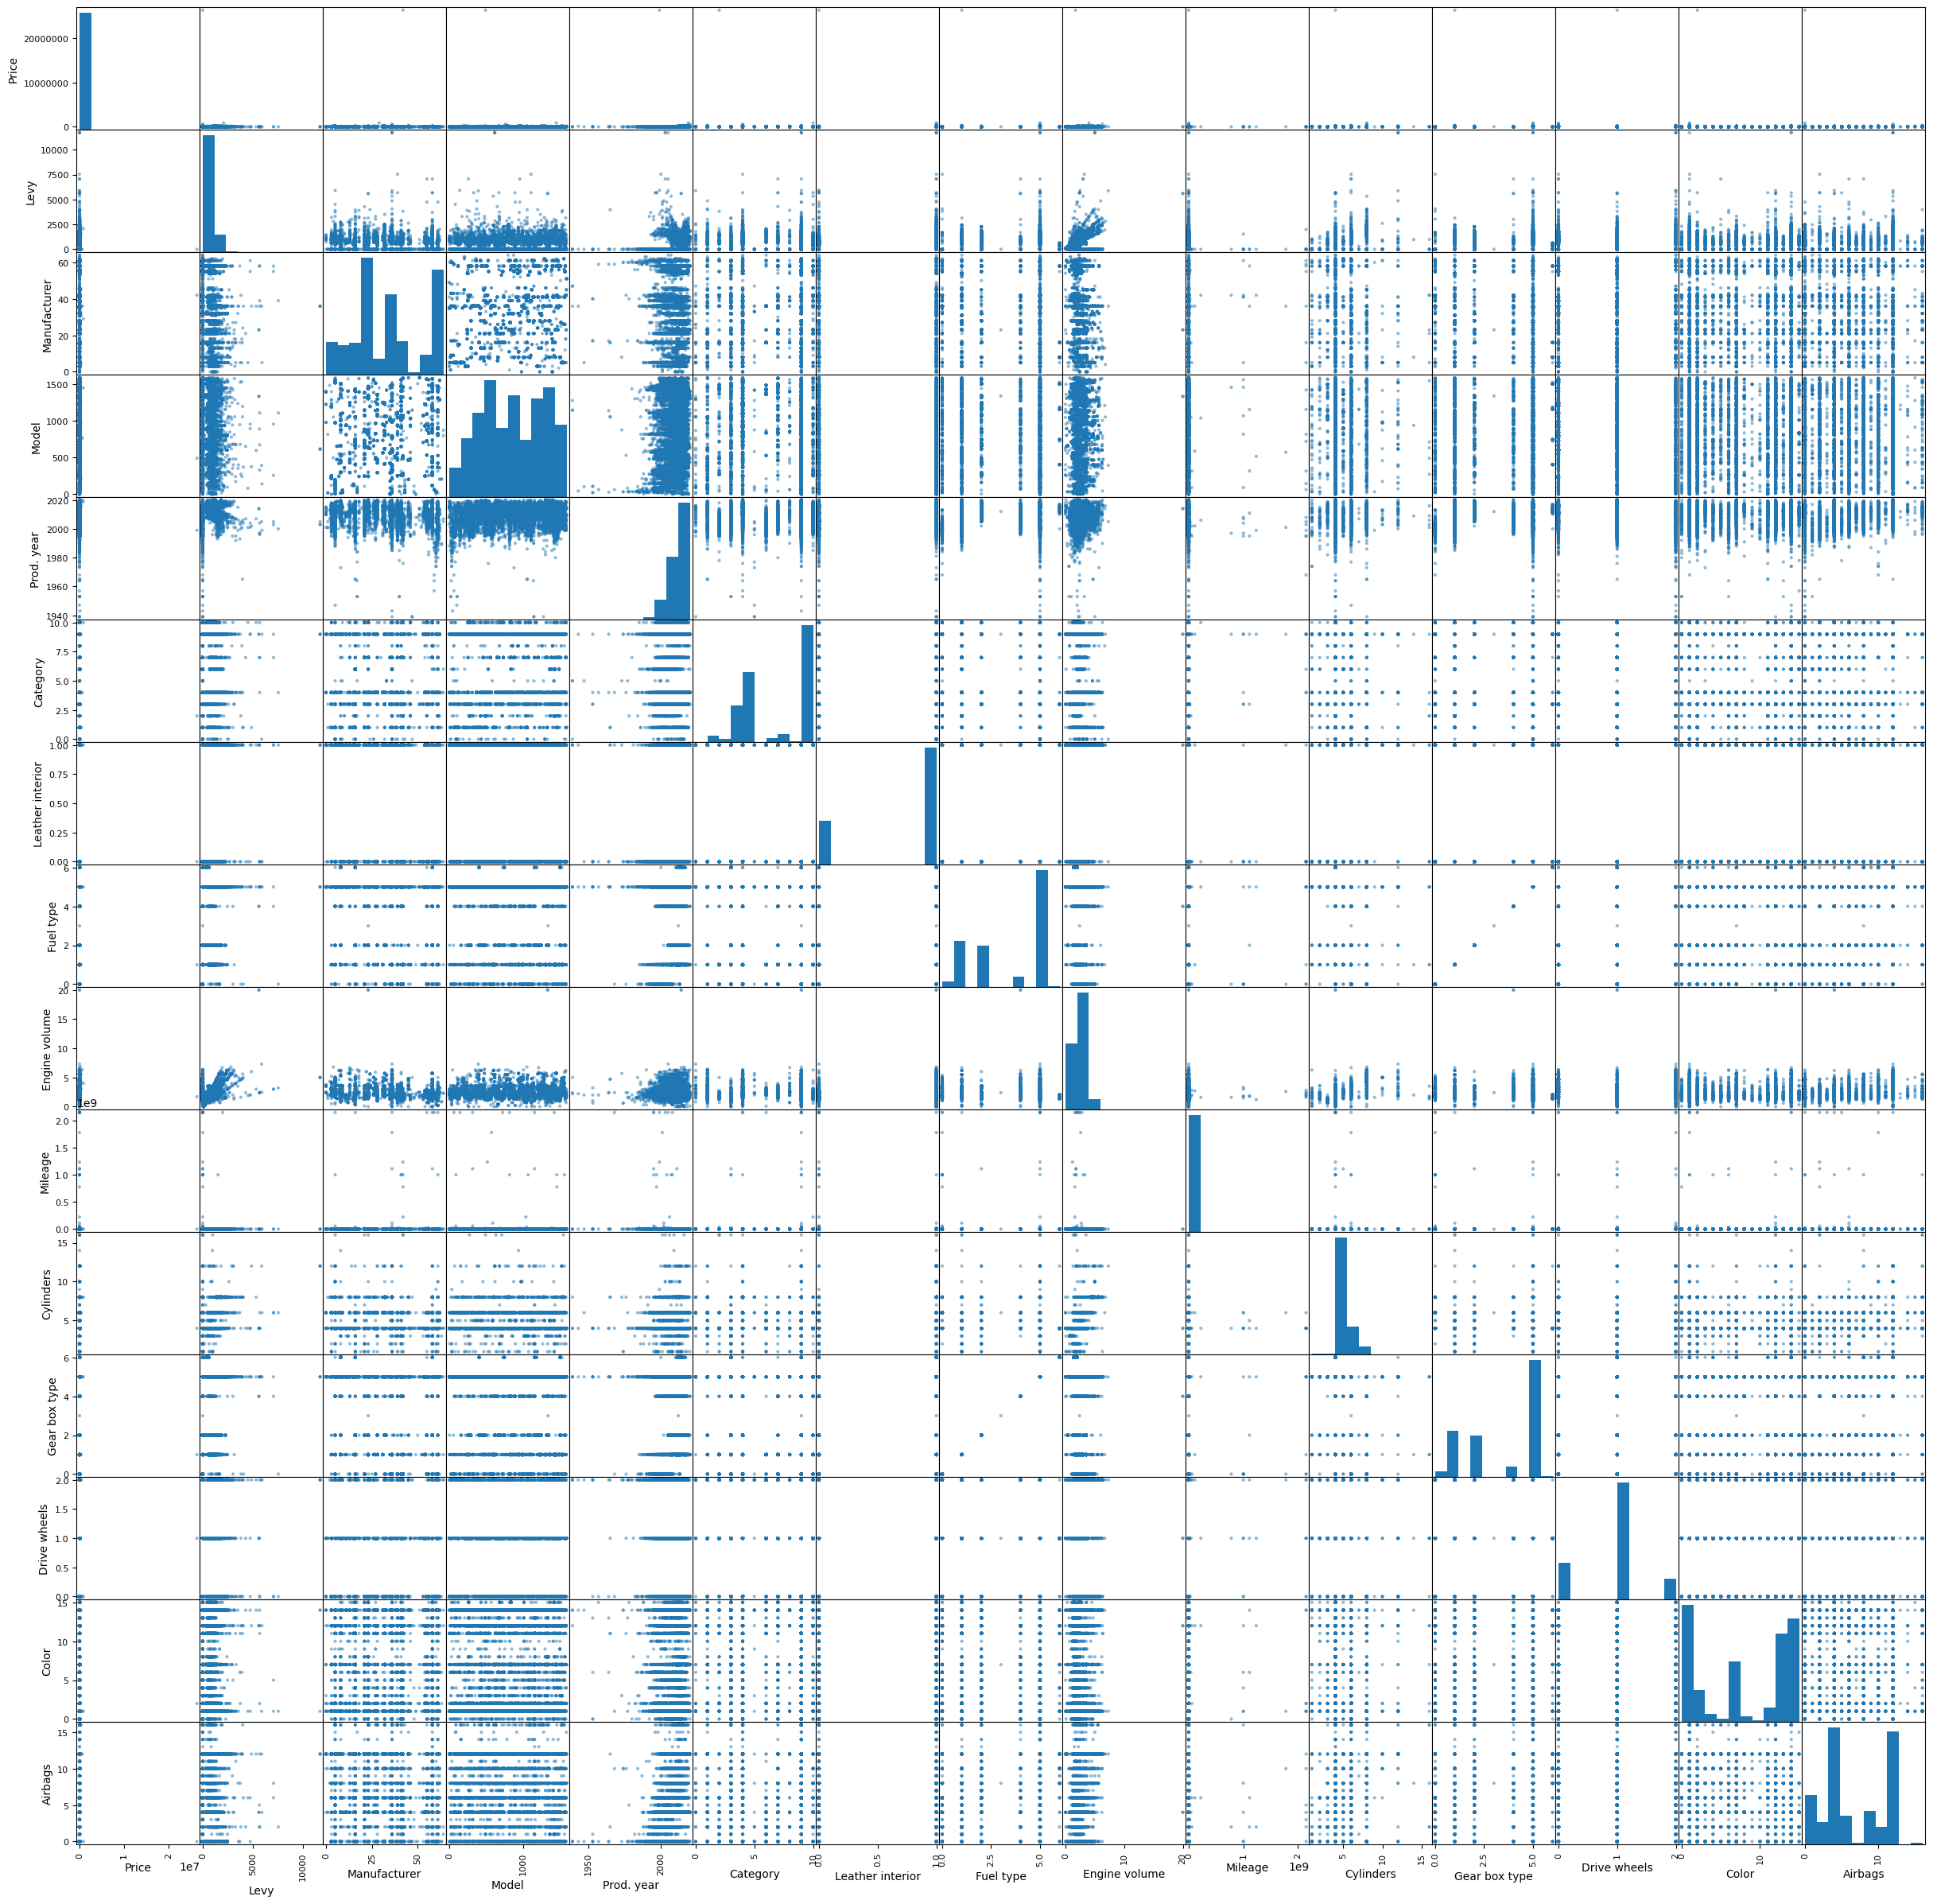

In [19]:
pd.plotting.scatter_matrix(data,figsize=(30, 30))
plt.show()

In [20]:
data.corr()

Price      Levy  Manufacturer     Model  Prod. year  \
Price             1.000000 -0.003701     -0.003886  0.000761    0.012982   
Levy             -0.003701  1.000000     -0.058426  0.025973    0.364712   
Manufacturer     -0.003886 -0.058426      1.000000 -0.018942   -0.050922   
Model             0.000761  0.025973     -0.018942  1.000000    0.062425   
Prod. year        0.012982  0.364712     -0.050922  0.062425    1.000000   
Category         -0.019721  0.013477     -0.038340 -0.166118    0.071538   
Leather interior  0.000754  0.333184     -0.174997 -0.001904    0.390066   
Fuel type        -0.012419  0.012358     -0.086630 -0.166467    0.058961   
Engine volume     0.008753  0.377438     -0.041829  0.029317   -0.030906   
Mileage          -0.001758 -0.021034      0.012479 -0.008038   -0.063501   
Cylinders         0.007518  0.250950     -0.089523 -0.005878   -0.096797   
Gear box type    -0.012419  0.012358     -0.086630 -0.166467    0.058961   
Drive wheels     -0.003419 -0.159964     -0.065689 -0.187070   -0.125912   
Color            -0.010295 -0.014361      0.032720  0.072299    0.009943   
Airbags          -0.012824  0.128032      0.180210 -0.101957    0.236969   

                  Category  Leather interior  Fuel type  Engine volume  \
Price            -0.019721          0.000754  -0.012419       0.008753   
Levy              0.013477          0.333184   0.012358       0.377438   
Manufacturer     -0.038340         -0.174997  -0.086630      -0.041829   
Model            -0.166118         -0.001904  -0.166467       0.029317   
Prod. year        0.071538          0.390066   0.058961      -0.030906   
Category          1.000000          0.091701   0.112440       0.002366   
Leather interior  0.091701          1.000000  -0.029814       0.274647   
Fuel type         0.112440         -0.029814   1.000000       0.025386   
Engine volume     0.002366          0.274647   0.025386       1.000000   
Mileage           0.008126         -0.034379  -0.015306      -0.006289   
Cylinders        -0.066238          0.202473   0.081037       0.778524   
Gear box type     0.112440         -0.029814   1.000000       0.025386   
Drive wheels      0.213743         -0.090536  -0.044218      -0.224052   
Color            -0.019184         -0.055987  -0.077919      -0.121199   
Airbags           0.131772          0.165023   0.081676       0.224441   

                   Mileage  Cylinders  Gear box type  Drive wheels     Color  \
Price            -0.001758   0.007518      -0.012419     -0.003419 -0.010295   
Levy             -0.021034   0.250950       0.012358     -0.159964 -0.014361   
Manufacturer      0.012479  -0.089523      -0.086630     -0.065689  0.032720   
Model            -0.008038  -0.005878      -0.166467     -0.187070  0.072299   
Prod. year       -0.063501  -0.096797       0.058961     -0.125912  0.009943   
Category          0.008126  -0.066238       0.112440      0.213743 -0.019184   
Leather interior -0.034379   0.202473      -0.029814     -0.090536 -0.055987   
Fuel type        -0.015306   0.081037       1.000000     -0.044218 -0.077919   
Engine volume    -0.006289   0.778524       0.025386     -0.224052 -0.121199   
Mileage           1.000000  -0.001768      -0.015306      0.008567 -0.012593   
Cylinders        -0.001768   1.000000       0.081037     -0.208963 -0.121727   
Gear box type    -0.015306   0.081037       1.000000     -0.044218 -0.077919   
Drive wheels      0.008567  -0.208963      -0.044218      1.000000  0.061139   
Color            -0.012593  -0.121727      -0.077919      0.061139  1.000000   
Airbags          -0.009201   0.176868       0.081676     -0.023810 -0.075554   

                   Airbags  
Price            -0.012824  
Levy              0.128032  
Manufacturer      0.180210  
Model            -0.101957  
Prod. year        0.236969  
Category          0.131772  
Leather interior  0.165023  
Fuel type         0.081676  
Engine volume     0.224441  
Mileage          -0.009201  
Cylinders         0

# Separating into dependent and independent variables

In [17]:
X = data.iloc[:,1:]
X

Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0      1399.0            32   1241        2010         4                 1   
1      1018.0             8    658        2011         4                 0   
2         0.0            21    681        2006         3                 0   
3       862.0            16    661        2011         4                 1   
4       446.0            21    681        2014         3                 1   
...       ...           ...    ...         ...       ...               ...   
19232     0.0            36    379        1999         1                 1   
19233   831.0            23   1332        2011         9                 1   
19234   836.0            23   1441        2010         4                 1   
19235  1288.0             8    456        2007         4                 1   
19236   753.0            23   1332        2012         9                 1   

       Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
0              2            3.5   186005          6              2   
1              5            3.0   192000          6              5   
2              5            1.3   200000          4              5   
3              2            2.5   168966          4              2   
4              5            1.3    91901          4              5   
...          ...            ...      ...        ...            ...   
19232          0            2.0   300000          4              0   
19233          5            2.4   161600          4              5   
19234          1            2.0   116365          4              1   
19235          1            2.0    51258          4              1   
19236          2            2.4   186923          4              2   

       Drive wheels  Color  Airbags  
0                 0     12       12  
1                 0      1        8  
2                 1      1        2  
3                 0     14        0  
4                 1     12        4  
...             ...    ...      ...  
19232             2     12        5  
19233             1     11        8  
19234             1      7        4  
19235             1      1        4  
19236             1     14       12  

[19237 rows x 14 columns]

In [18]:
Y = data.iloc[:,:1]
Y

Price
0      13328
1      16621
2       8467
3       3607
4      11726
...      ...
19232   8467
19233  15681
19234  26108
19235   5331
19236    470

[19237 rows x 1 columns]

# Splitting data into training and testing data

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [25]:
X_train

Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
3975    836.0            23   1332        2010         9                 1   
18332   308.0            58   1154        2014         3                 1   
16965   640.0            16    742        2013         9                 1   
15416  1094.0            54    930        2008         4                 1   
18541   779.0            55    721        2013         9                 1   
...       ...           ...    ...         ...       ...               ...   
9225    781.0            58    435        2012         9                 1   
13123  3184.0            16   1054        2004         9                 1   
9845    922.0            42    281        2009         9                 0   
10799   833.0             8    456        2015         4                 1   
2732      0.0            27    828        1999         4                 1   

       Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
3975           5            2.0   126799          4              5   
18332          2            1.8   270410          4              2   
16965          2            2.0   128341          4              2   
15416          1            2.0    54752          4              1   
18541          5            2.5    74688          4              5   
...          ...            ...      ...        ...            ...   
9225           2            2.5   159379          4              2   
13123          5            3.9    60426          6              5   
9845           1            1.9   196000          4              1   
10799          1            2.2    60000          4              1   
2732           5            5.9    20000          8              5   

       Drive wheels  Color  Airbags  
3975              1      1        4  
18332             1     14       12  
16965             1      1        0  
15416             1     12        4  
18541             0     12        0  
...             ...    ...      ...  
9225              1     14       12  
13123             2      1       12  
9845              1     12       10  
10799             1     12        4  
2732              0      1       12  

[13465 rows x 14 columns]

In [27]:
Y_train

Price
3975   16894
18332    941
16965    392
15416   4077
18541     94
...      ...
9225    3136
13123   2744
9845    9722
10799  23414
2732    8467

[13465 rows x 1 columns]

In [26]:
X_test

Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
15458   583.0             8    298        2011         9                 1   
15175   779.0            58    291        2013         9                 1   
9132    583.0            28   1227        2011         9                 1   
10435     0.0            42    273        1998         2                 0   
3249    607.0            58    435        2019         9                 1   
...       ...           ...    ...         ...       ...               ...   
16051     0.0            38    520        2011         4                 1   
1570   1172.0            32    621        2011         9                 1   
18826   919.0            61   1414        2012         4                 1   
11781     0.0            58   1154        2015         3                 0   
18087   891.0            23   1302        2016         4                 1   

       Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
15458          5            1.6   125837          4              5   
15175          2            2.5    51543          4              2   
9132           5            1.6        0          4              5   
10435          1            1.7    55000          4              1   
3249           2            2.5    39552          4              2   
...          ...            ...      ...        ...            ...   
16051          5            1.6   119416          4              5   
1570           5            3.5   229736          6              5   
18826          1            3.0   242955          6              1   
11781          2            1.8   253206          6              2   
18087          1            2.0   160931          4              1   

       Drive wheels  Color  Airbags  
15458             1      1        4  
15175             1     12       12  
9132              1     12       12  
10435             1      6        2  
3249              1      1       12  
...             ...    ...      ...  
16051             1      2       12  
1570              1      7       12  
18826             0     14       12  
11781             1     12        6  
18087             1     14        4  

[5772 rows x 14 columns]

In [28]:
Y_test

Price
15458  10697
15175  42337
9132     314
10435   2800
3249     251
...      ...
16051  19757
1570     549
18826    188
11781  20385
18087  43062

[5772 rows x 1 columns]

# Methods that are used to encode categorical features.

One-hot/dummy encoding

Label / Ordinal encoding

Target encoding

Frequency / count encoding

Binary encoding

Feature Hashing

# Two types of categorical data.

Nominal data -> Nominal data is used to name variables without providing numerical value. Nominal data is sometimes referred to as “named” data. Examples of nominal data include name, height, and weight.

Ordinal data -> Ordinal data has a set order or scale to it. It can be both types of data, but it exhibits more categorical data characteristics. Some examples of ordinal variables include customer satisfaction surveys, interval scales, and bug escalation.


# Importance of feature scaling.

Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0.

Even if tree based models are (almost) not affected by scaling, many other algorithms require features to be normalized, often for different reasons: to ease the convergence (such as a non-penalized logistic regression), to create a completely different model fit compared to the fit with unscaled data (such as KNeighbors models).

# Applying Scaling technique

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [33]:
X_train[:5]

array([[ 0.34523386, -0.56252104,  1.14036805, -0.15172004,  0.98167284,
         0.61451976,  0.87133031, -0.3546026 , -0.0315414 , -0.48842262,
         0.87133031,  0.15867547, -1.25790399, -0.59468523],
       [-0.56347933,  1.40887941,  0.70855549,  0.54617399, -1.1660605 ,
         0.61451976, -0.78649965, -0.58467652, -0.02871852, -0.48842262,
        -0.78649965,  0.15867547,  1.16410635,  1.25776244],
       [ 0.00790851, -0.95680114, -0.29092078,  0.37170049,  0.98167284,
         0.61451976, -0.78649965, -0.3546026 , -0.03151109, -0.48842262,
        -0.78649965,  0.15867547, -1.25790399, -1.52090906],
       [ 0.78926417,  1.1835765 ,  0.16515091, -0.50066705, -0.80810494,
         0.61451976, -1.33910963, -0.3546026 , -0.03295759, -0.48842262,
        -1.33910963,  0.15867547,  0.79148937, -0.59468523],
       [ 0.24713414,  1.23990223, -0.34186496,  0.37170049,  0.98167284,
         0.61451976,  0.87133031,  0.22058219, -0.03256572, -0.48842262,
         0.87133031, -1.60

# Image Data

# Loading Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Loding Images from the folders

In [4]:
train_path = r"G:\Design of Artificial Intelligence Products\Dogs_Cats\train"
test_path = r"G:\Design of Artificial Intelligence Products\Dogs_Cats\train"
val_path = r"G:\Design of Artificial Intelligence Products\Dogs_Cats\test"

In [5]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

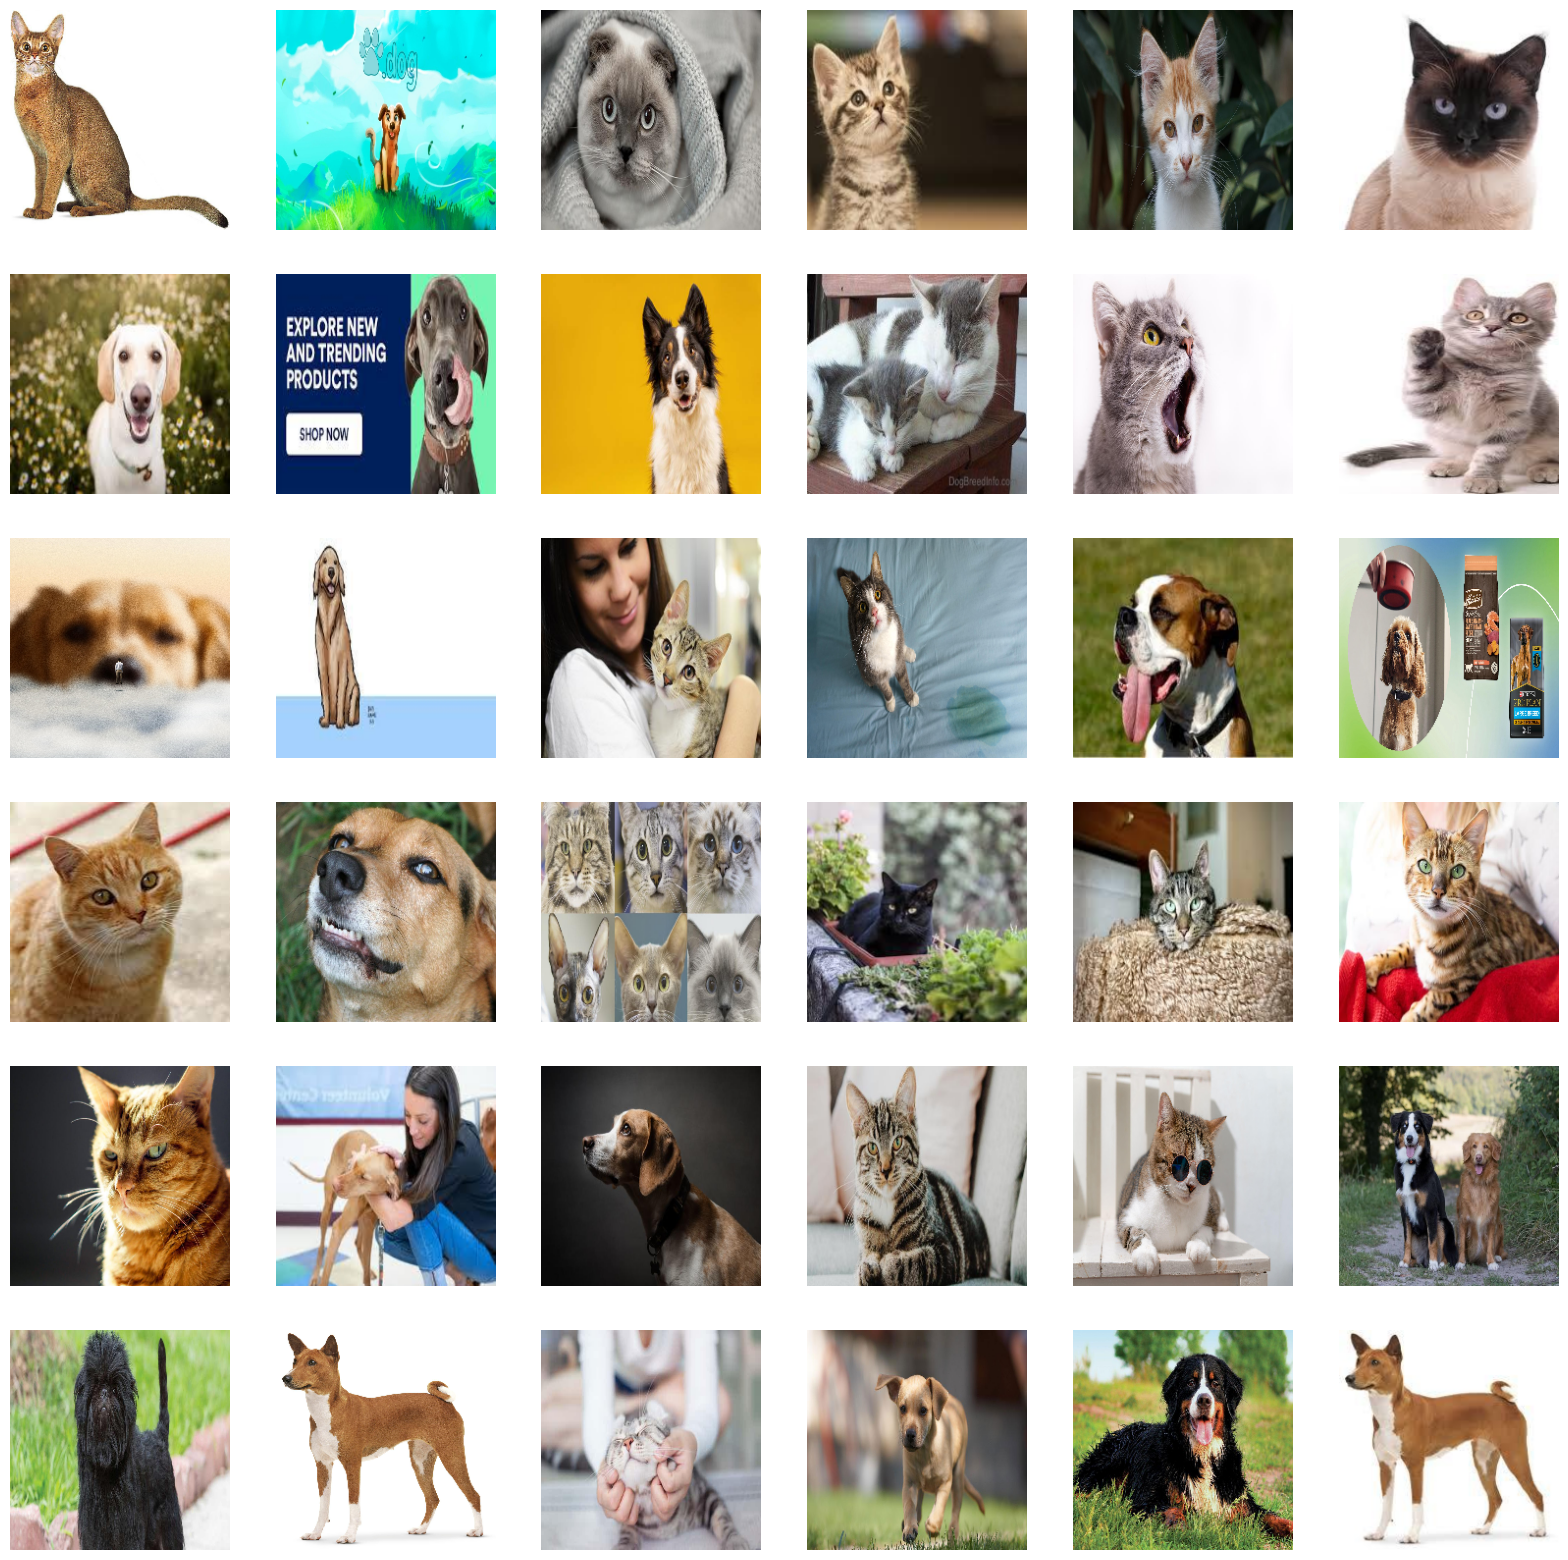

In [22]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB))   
    plt.axis('off')

# Converting images into arrays

In [6]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)

# Normalization

In [7]:
train_x = train_x/255.0
test_x = test_x/255.0
val_x = val_x/255.0

# Generating Labels for data

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 557 images belonging to 2 classes.
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


# Finding how the classes have been encoded in the data

In [10]:
train_y = training_set.classes
test_y = test_set.classes
val_y = val_set.classes

In [11]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
train_y.shape,test_y.shape,val_y.shape

((557,), (557,), (140,))